In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Diwali Sales Data.csv")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11243 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11243 non-null  int64  
 1   Cust_name         11243 non-null  object 
 2   Product_ID        11243 non-null  object 
 3   Gender            11243 non-null  object 
 4   Age Group         11243 non-null  object 
 5   Age               11243 non-null  int64  
 6   Marital_Status    11243 non-null  int64  
 7   State             11243 non-null  object 
 8   Zone              11243 non-null  object 
 9   Occupation        11243 non-null  object 
 10  Product_Category  11243 non-null  object 
 11  Orders            11243 non-null  int64  
 12  Amount            11231 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.4+ MB


In [6]:
#drop unrelated and blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [12]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
df["Amount"]=df['Amount'].astype('int64')

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

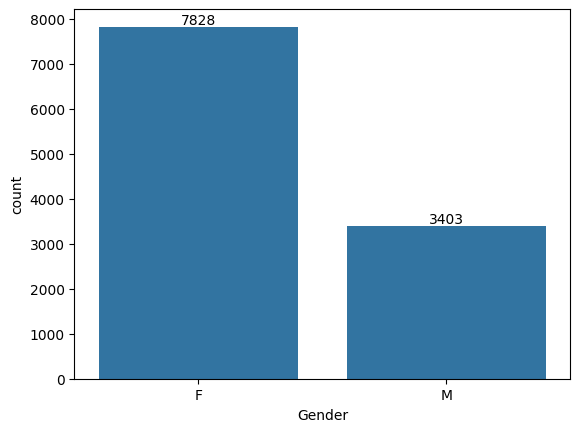

In [17]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

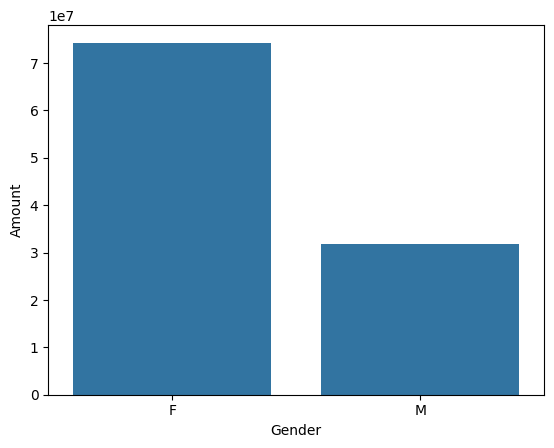

In [19]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y="Amount",data=sales_gen)

In [21]:
sales_gen

,Gender,Amount
0,F,74307679
1,M,31871146


In [20]:
# this shows that most of the buyers are female and their purchsing power is also high

### Age

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

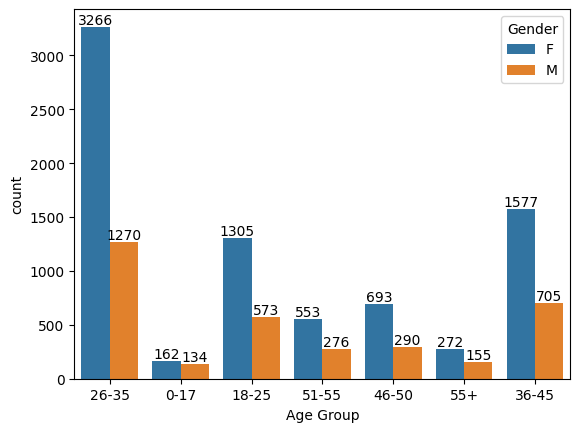

In [27]:
ax=sns.countplot(x='Age Group',hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

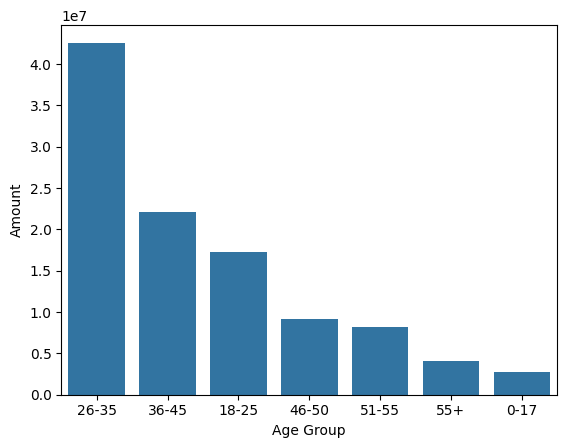

In [29]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y="Amount",data=sales_age)

In [30]:
sales_age

,Age Group,Amount
2,26-35,42581767
3,36-45,22135135
1,18-25,17235530
4,46-50,9207844
5,51-55,8237909
6,55+,4080987
0,0-17,2699653


In [31]:
#from above data we can say that most of the buyers are from age group 26-35 and have most amount for purchasing

### State

<Axes: xlabel='State', ylabel='Orders'>

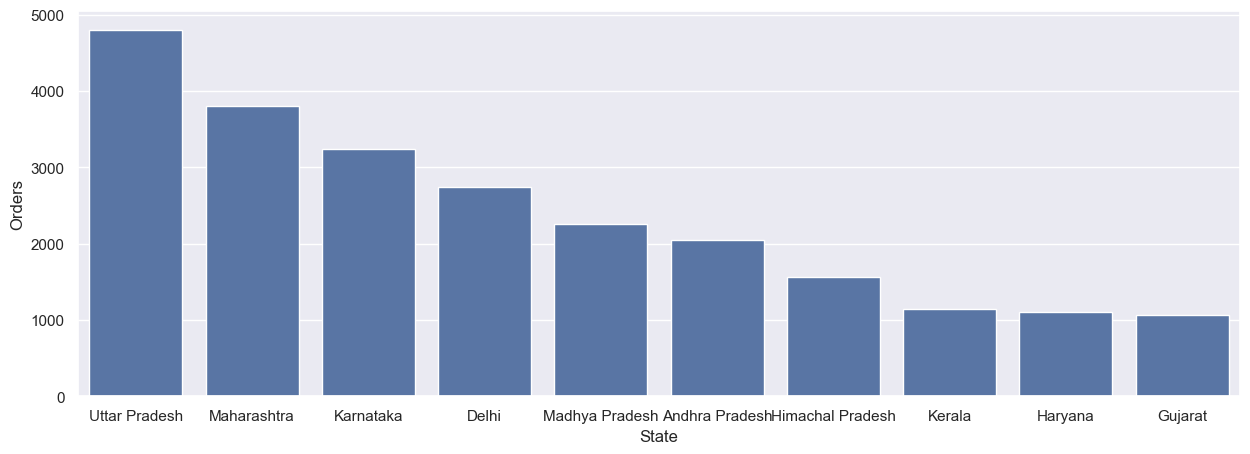

In [42]:
#total no of orders from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y="Orders",data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

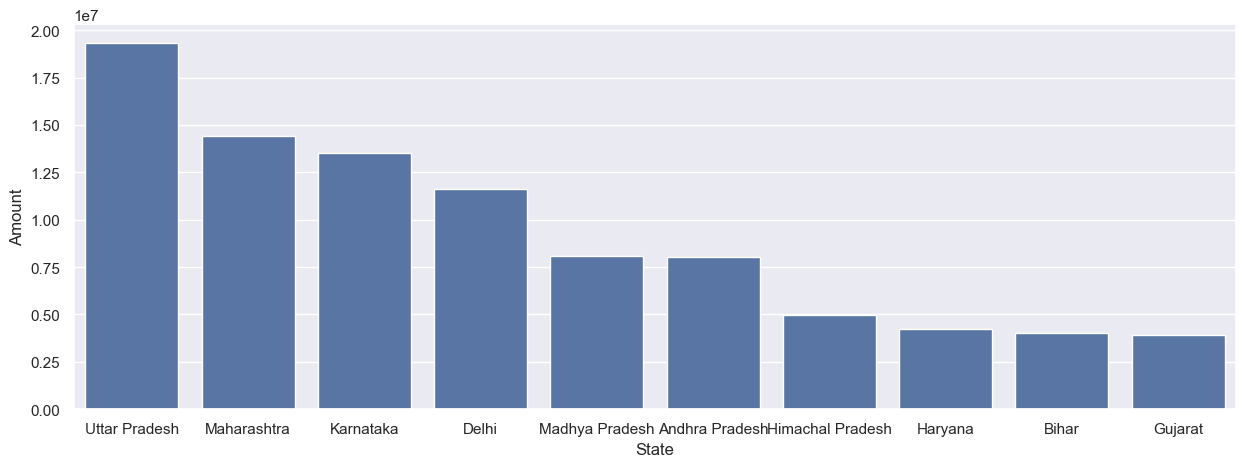

In [43]:
#total amount sales from top 10 states
sales_state1=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y="Amount",data=sales_state1)

### Marital Status

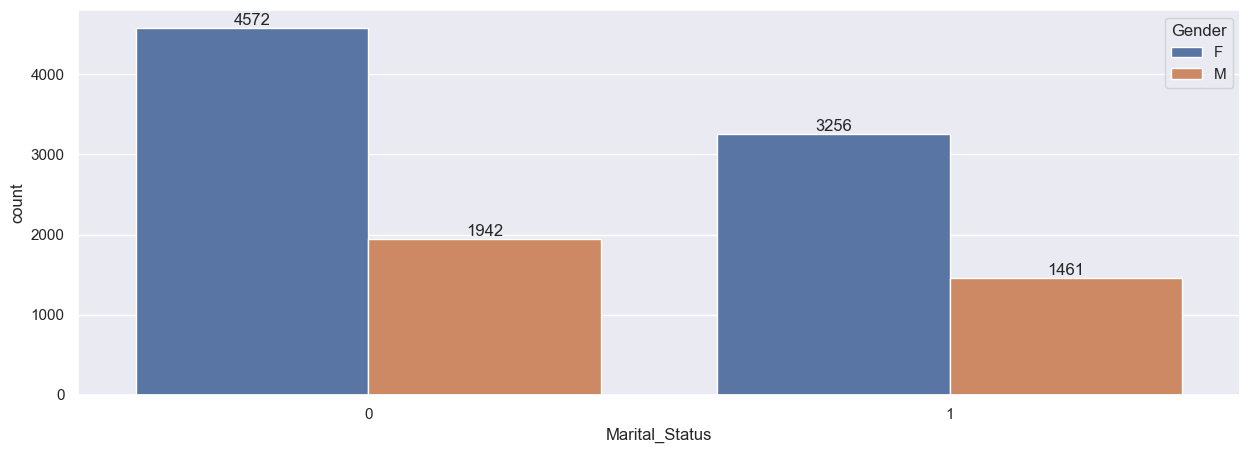

In [44]:
ax=sns.countplot(x='Marital_Status',hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

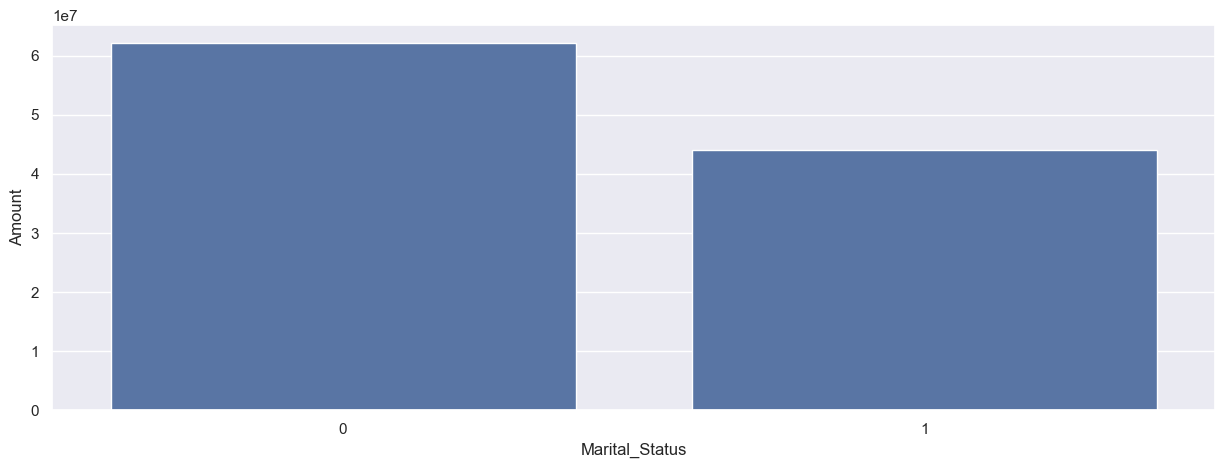

In [45]:
#total amount sales from top 10 states
sales_ms=df.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Marital_Status',y="Amount",data=sales_ms)

In [46]:
# this shows that most of buyers are unmarried women and they ahve high purchasing power

### Occupation

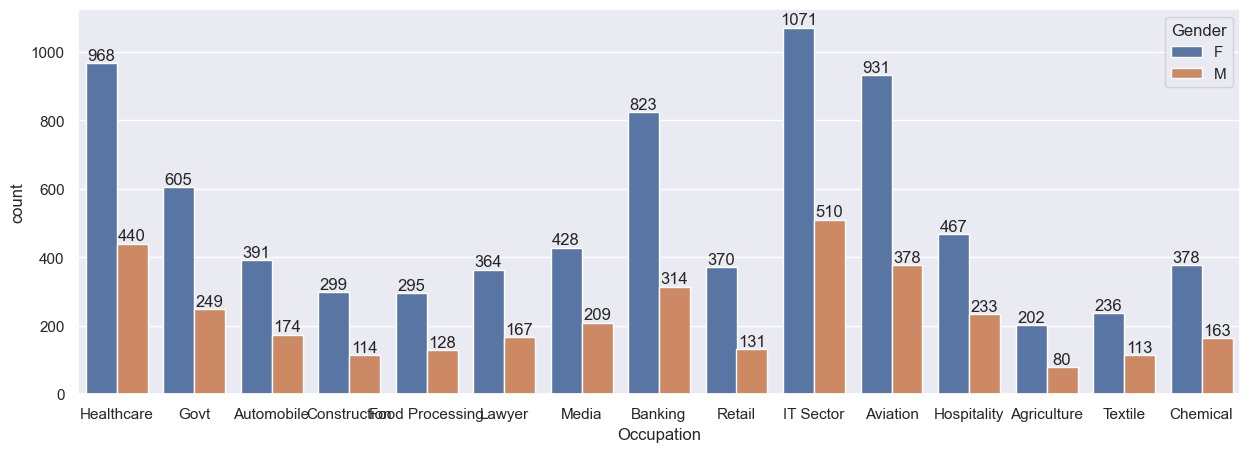

In [47]:
ax=sns.countplot(x='Occupation',hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

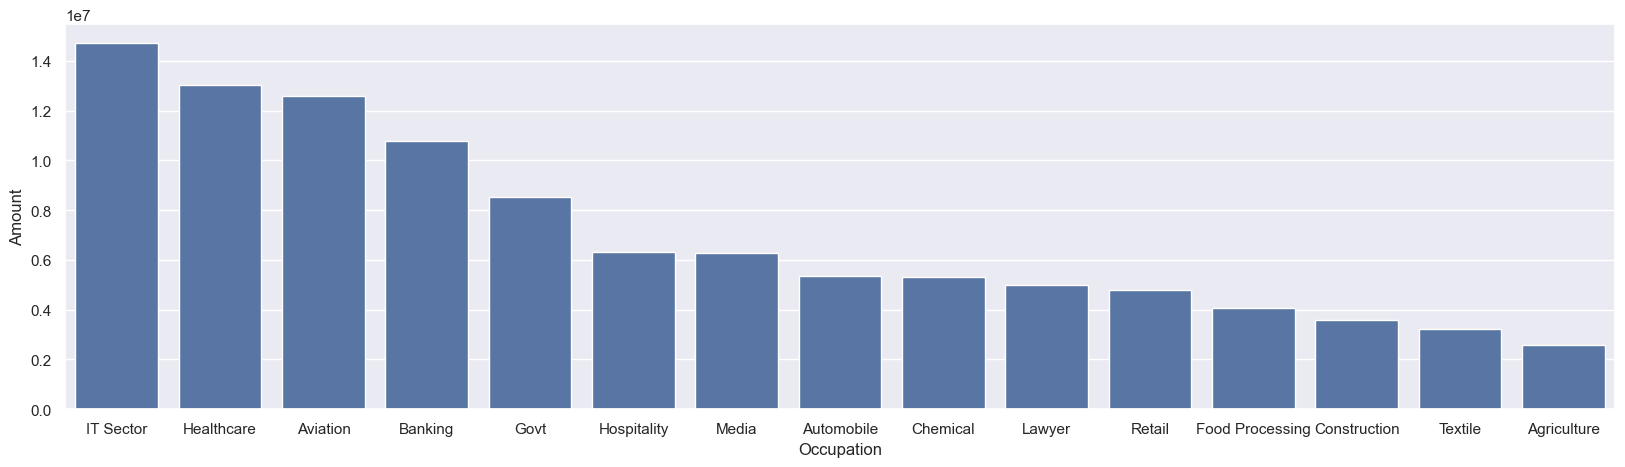

In [50]:
#total amount sales from top 10 states
sales_ms=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y="Amount",data=sales_ms)

In [51]:
# this shows that most of the buyers are womwn from it sector ,then healthcare ,then aviation...

### Product Category

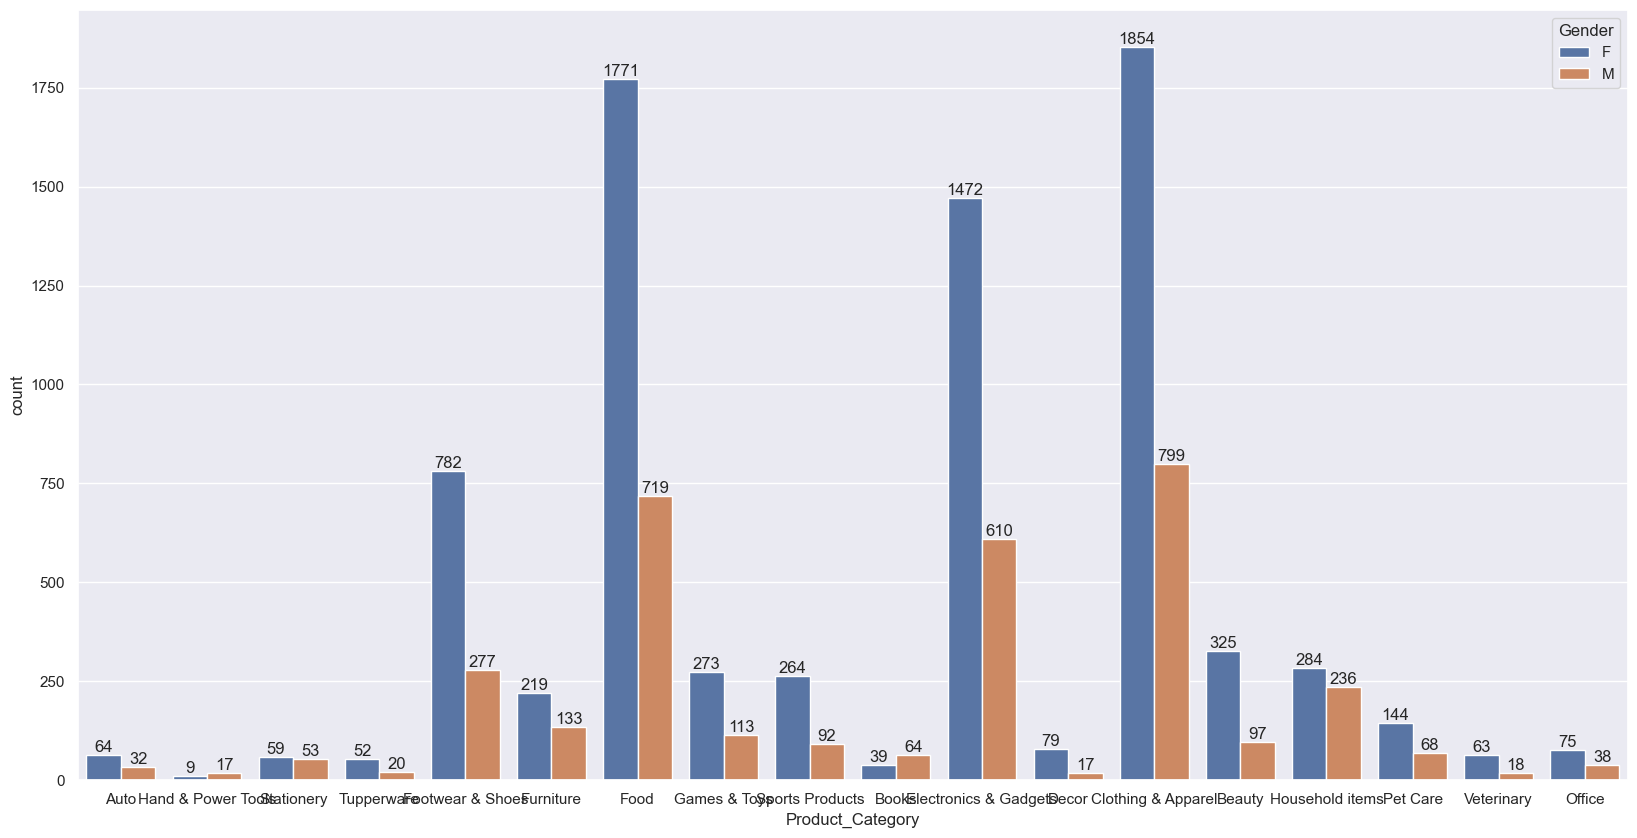

In [64]:
ax=sns.countplot(x='Product_Category',hue='Gender',data=df)
sns.set(rc={'figure.figsize':(20,10)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

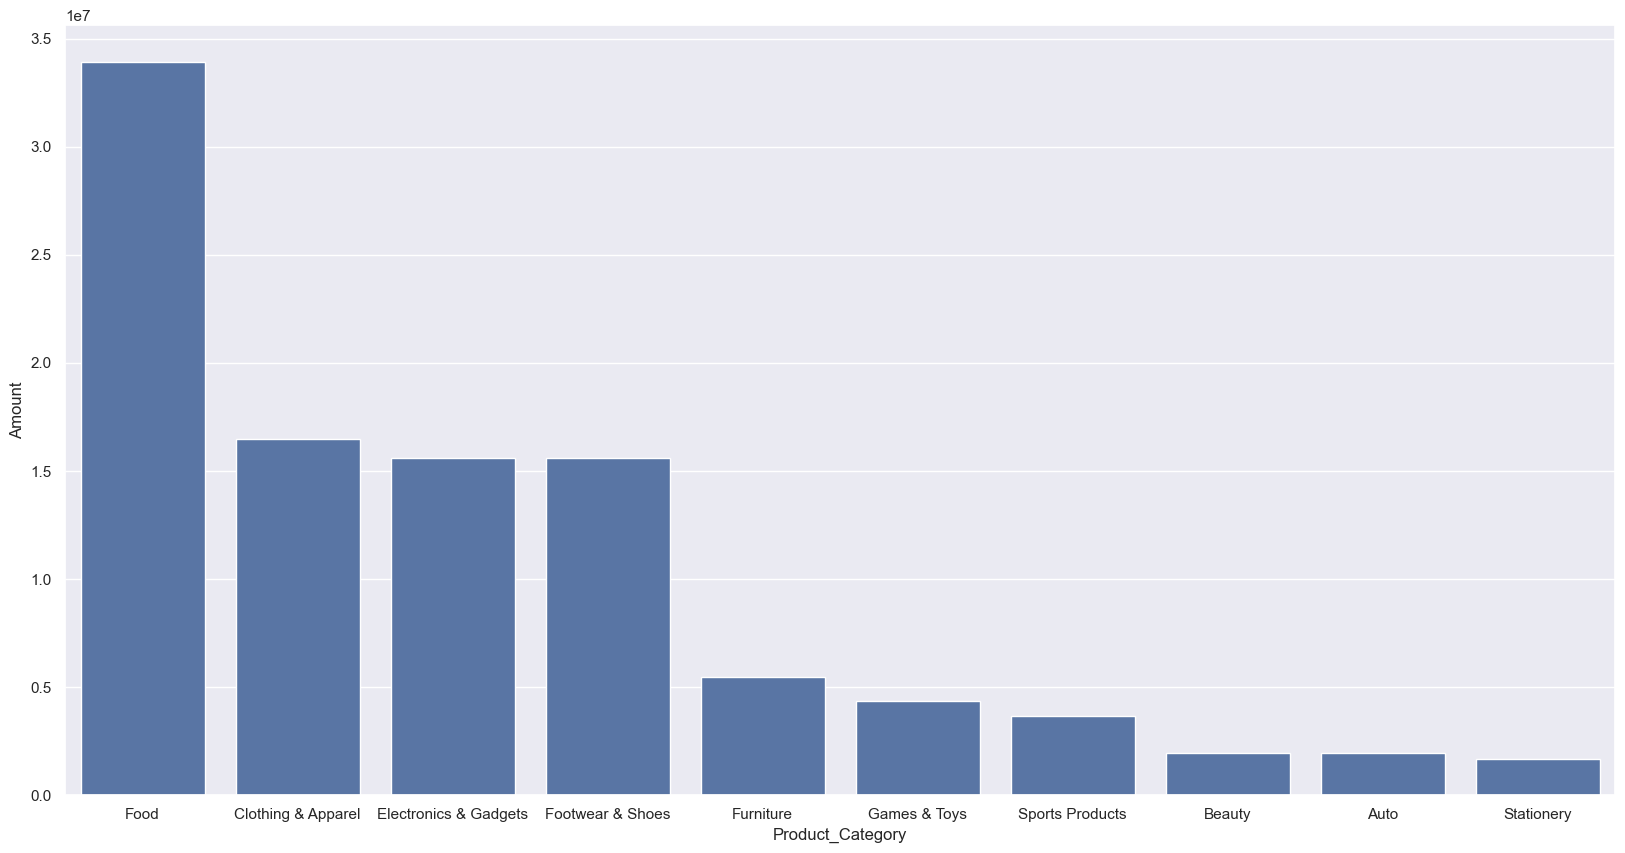

In [66]:
sales_ms=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='Product_Category',y="Amount",data=sales_ms)

In [65]:
# most of purchased item is 1.cloths 2.food 3.electronics 
# but
# amount spend is most on 1.food 2.cloths 3.electronics

<Axes: xlabel='Product_ID', ylabel='Amount'>

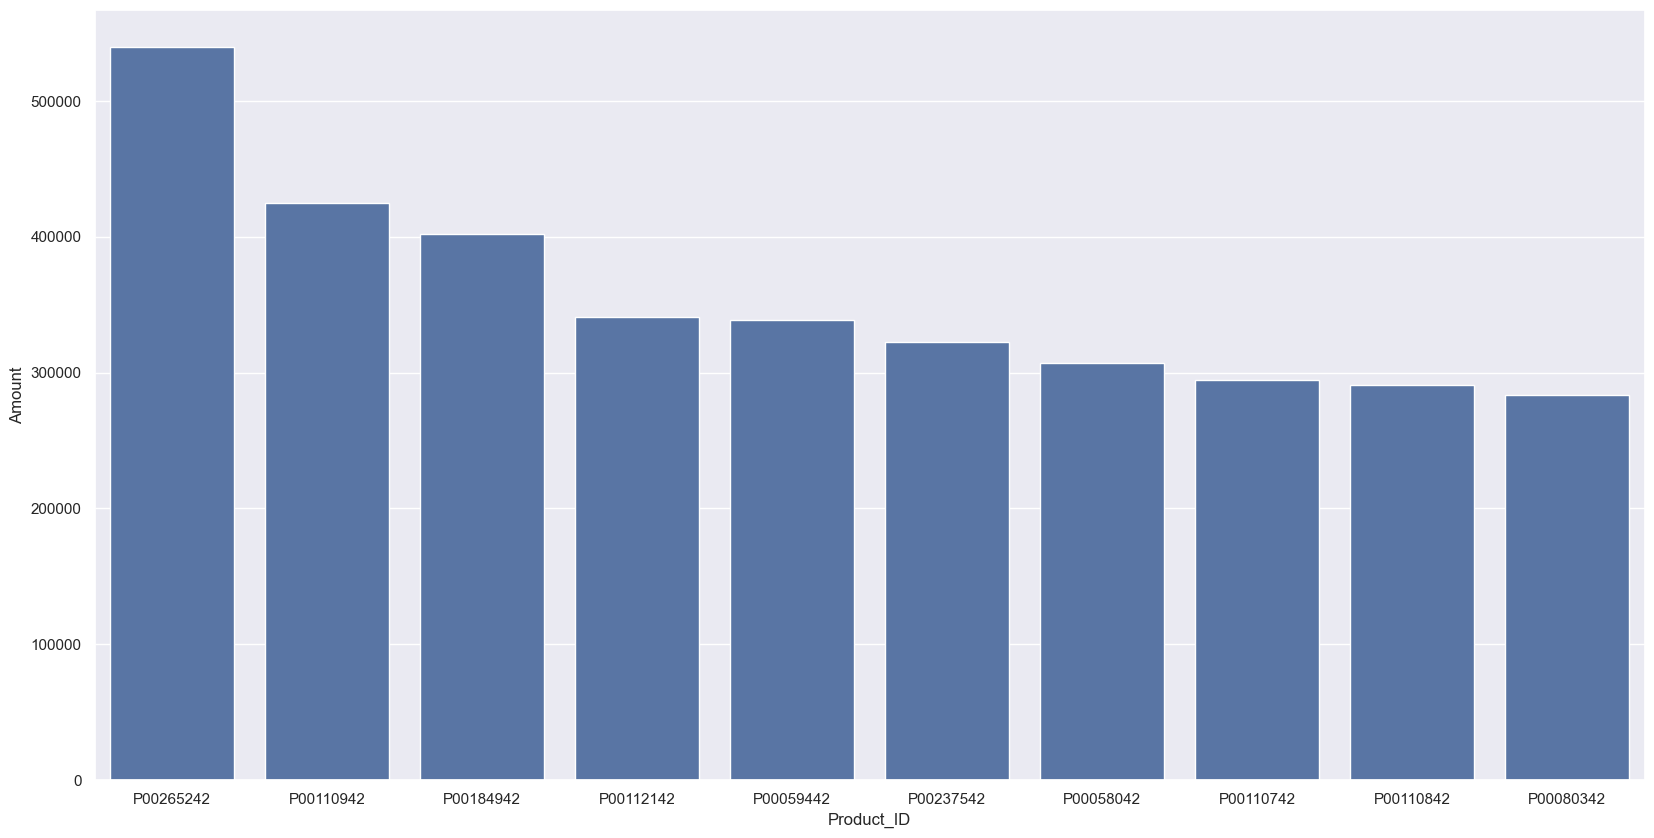

In [67]:
sales_ms=df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='Product_ID',y="Amount",data=sales_ms)

In [68]:
# most hotselling product is 'P00265242'

## CONCLUSION

##### Unmarried women from age group 26-35 from UP,Maharashtra,Karnataka and working in IT sector,Healthcare and Aviation
##### are more likely to purchase items from Food,Cloths and Electronics category.